In [1]:
import copy
from IPython.display import display, Image
import logging
import numpy
import os
import pandas
import pdb
import plotly
import pprint
import pyarrow
import pyarrow.parquet as pq
import six
import sys
import tensorflow as tf
import time

import CS230

plotly.offline.init_notebook_mode(connected=True)

In [2]:
logger = CS230.common.get_logger(level=logging.INFO)

In [3]:
file_paths = CS230.data.get_all_file_paths()
logger.debug(file_paths)

21-10-32 | INFO | num files: 22


In [4]:
file_path = file_paths[0]

df = CS230.data.load(file_path)
#df = CS230.data.stride_rows(df, stride=10)
#df, deriv_cols = CS230.data.add_derivatives(df, strides=[1])

In [5]:
df.keys()

Index(['time', 'handwheelAngle', 'throttle', 'brake', 'clutch', 'engineSpeed',
       'PPS', 'gpsTime', 'latitude', 'longitude', 'altitude', 'vNorth',
       'vEast', 'vUp', 'horizontalSpeed', 'vxCG', 'vyCG', 'vzCG', 'axCG',
       'ayCG', 'azCG', 'yawAngle', 'pitchAngle', 'rollAngle', 'rollRate',
       'pitchRate', 'yawRate', 'sideSlip', 'distance', 'numSVsTracked',
       'gpsPosMode', 'gpsVelMode', 'gpsOrientMode', 'HDOP', 'PDOP',
       'posAccuracy_north', 'posAccuracy_east', 'posAccuracy_down',
       'velAccuracy_north', 'velAccuracy_east', 'velAccuracy_down',
       'orientAccuracy_heading', 'orientAccuracy_pitch', 'orientAccuracy_roll',
       'chassisAccelFL', 'chassisAccelFR', 'chassisAccelRL', 'chassisAccelRR',
       'deflectionFL', 'deflectionFR', 'deflectionRL', 'deflectionRR',
       'wheelAccelFL', 'wheelAccelFR', 'wheelAccelRL', 'wheelAccelRR'],
      dtype='object')

In [6]:
image_paths = []

for file_path in file_paths:
    # load and process data file
    df = CS230.data.load(file_path)
    df = CS230.data.stride_rows(df, stride=10)
    df, deriv_cols = CS230.data.add_derivatives(df, strides=[1])
    #df = CS230.data.clean_discontinuities(df, stride=1)
    
    # plot steering, brake, throttle
    fig, image_path = CS230.data.plot(df, file_path, columns=CS230.data.COLUMNS_HUMAN_INPUT, plot=False, write=True)
    image_paths.append(image_path)
    
    # plot steering, brake, throttle zoomed
    fig, image_path = CS230.data.plot(df, file_path, columns=CS230.data.COLUMNS_HUMAN_INPUT, plot=False, write=True,
                                     start='middle', stop='middle', step=1)
    image_paths.append(image_path)
    
    # plot motion derivatives
    fig, image_path = CS230.data.plot(df, file_path, columns=deriv_cols, plot=False, write=True)
    image_paths.append(image_path)
    
    # plot motion derivatives zoomed
    fig, image_path = CS230.data.plot(df, file_path, columns=deriv_cols, plot=False, write=True,
                                     start='middle', stop='middle', step=1)
    image_paths.append(image_path)
    
    del df  # delete DataFrame to avoid running out of memory

logger.info('num images saved: %s', len(image_paths))

21-10-48 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-0-None-250-f9a3605.jpeg
21-10-49 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-128200-128300-1-f9a3605.jpeg
21-10-49 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-0-None-250-0e57fce.jpeg
21-10-49 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_01_01_01_grandsport-128200-128300-1-0e57fce.jpeg
21-10-50 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_02_01_01_grandsport-0-None-250-f9a3605.jpeg
21-10-50 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_02_01_01_grandsport-116250-116350-1-f9a3605.jpeg
21-10-51 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_02_01_01_grandsport-0-None-250-0e57fce.jpeg
21-10-51 | INFO | wrote: images/2013_Monterey_Motorsports_Reunion/20130810_02_01_01_grandsport-116250-116350-1-0e57fce.jpeg
21-10-52 | INFO | wrote: ima

21-11-12 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_03_03_03_250lm-0-None-250-0e57fce.jpeg
21-11-12 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_03_03_03_250lm-35200-35300-1-0e57fce.jpeg
21-11-12 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_04_01_03_250lm-0-None-250-f9a3605.jpeg
21-11-13 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_04_01_03_250lm-44400-44500-1-f9a3605.jpeg
21-11-13 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_04_01_03_250lm-0-None-250-0e57fce.jpeg
21-11-13 | INFO | wrote: images/2014_Targa_Sixty-Six/20140221_04_01_03_250lm-44400-44500-1-0e57fce.jpeg
21-11-14 | INFO | wrote: images/2014_Targa_Sixty-Six/20140222_01_01_03_250lm-0-None-250-f9a3605.jpeg
21-11-14 | INFO | wrote: images/2014_Targa_Sixty-Six/20140222_01_01_03_250lm-47250-47350-1-f9a3605.jpeg
21-11-14 | INFO | wrote: images/2014_Targa_Sixty-Six/20140222_01_01_03_250lm-0-None-250-0e57fce.jpeg
21-11-14 | INFO | wrote: images/2014_Targa_Sixty-Six/20140222_01_01_03_250lm-47

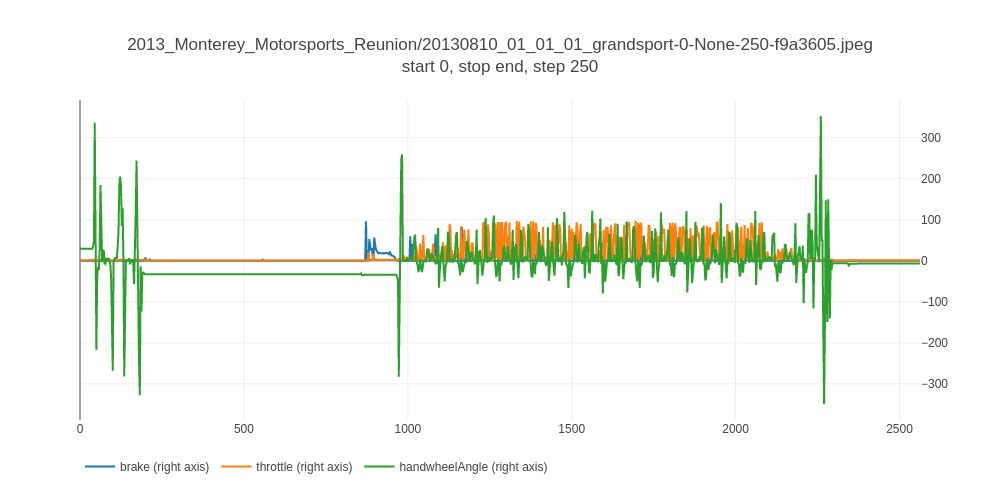

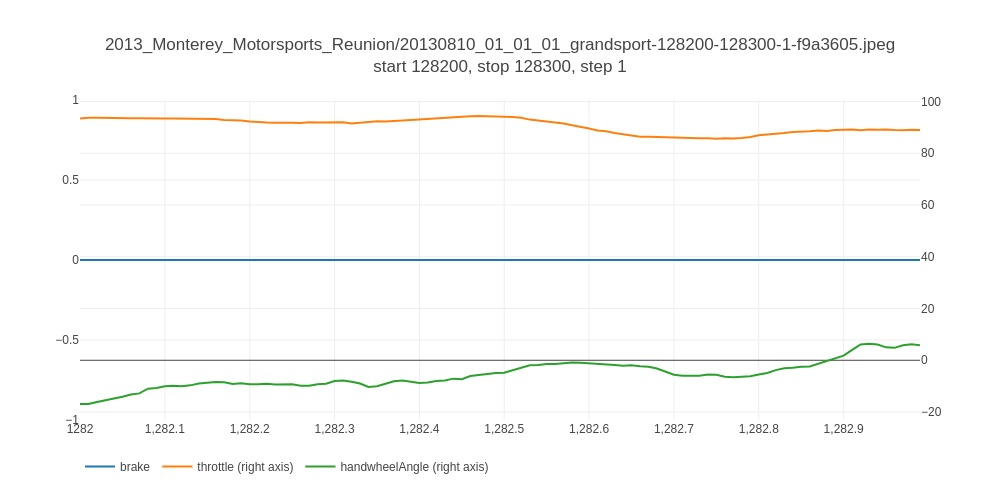

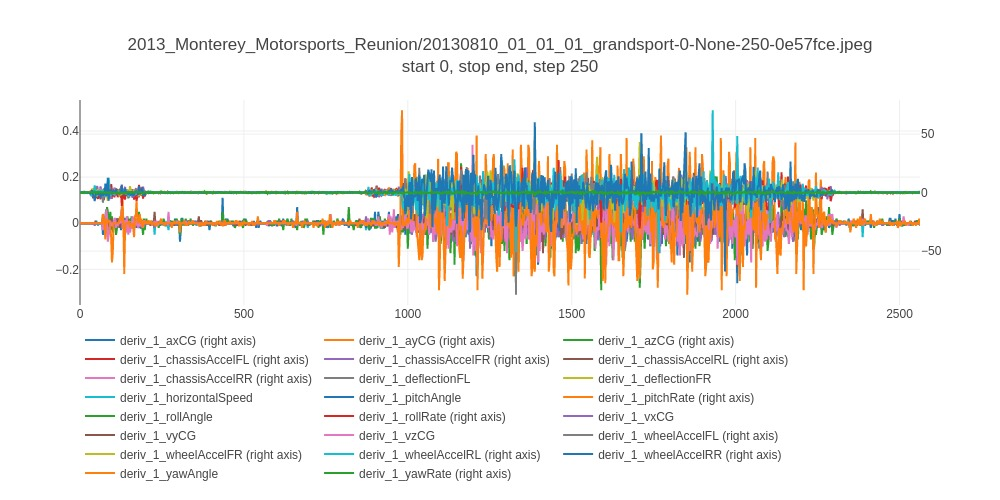

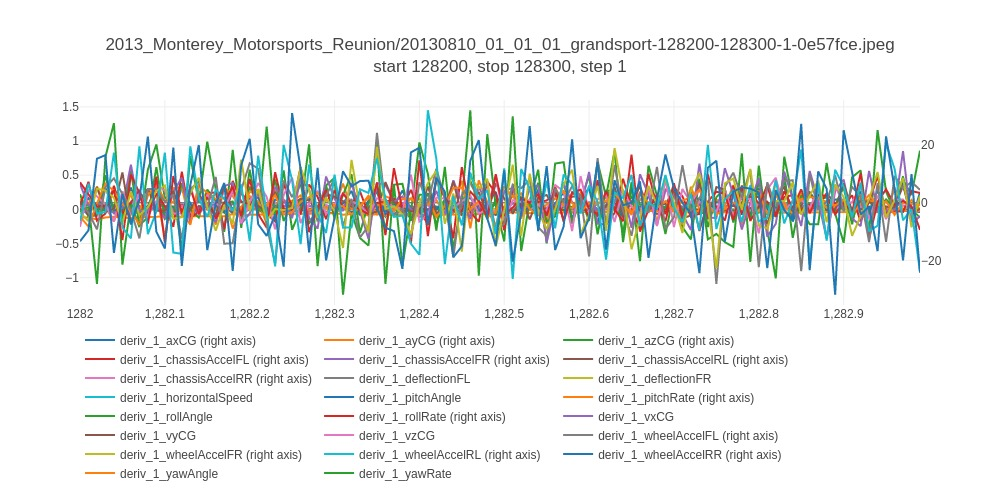

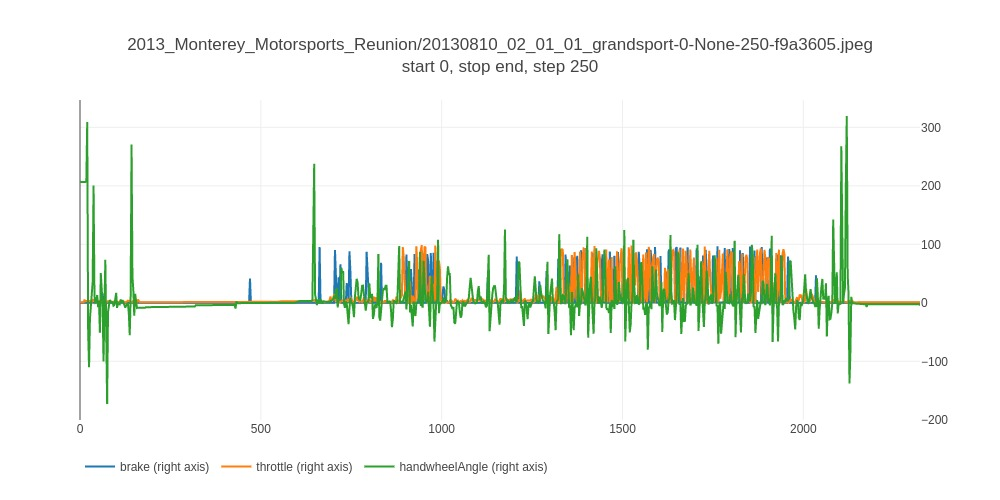

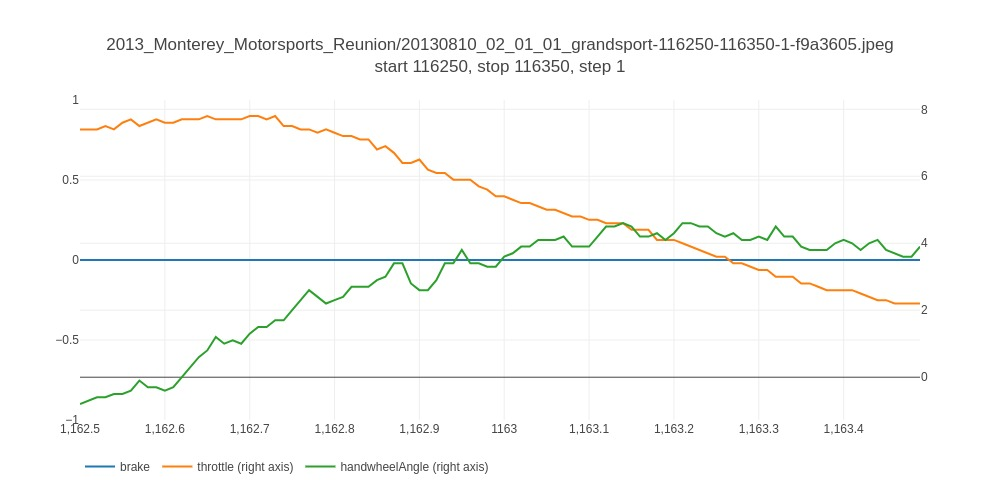

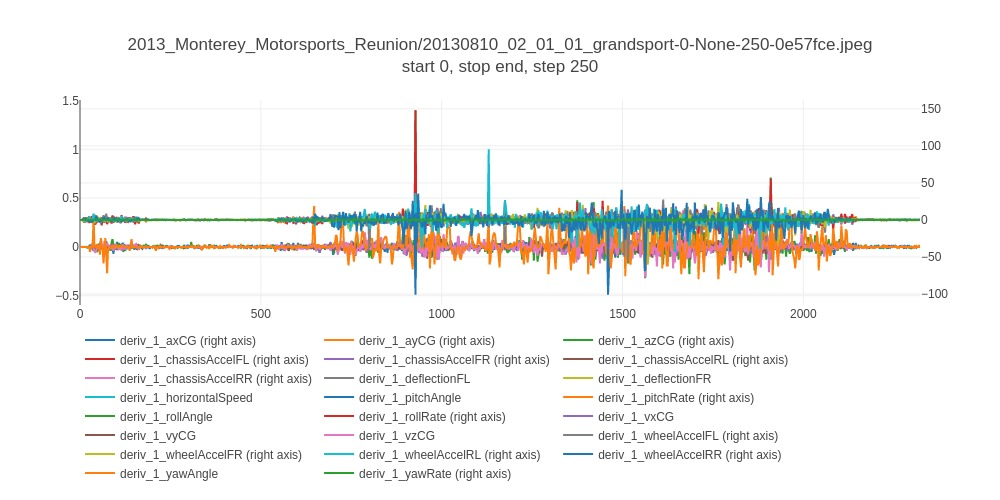

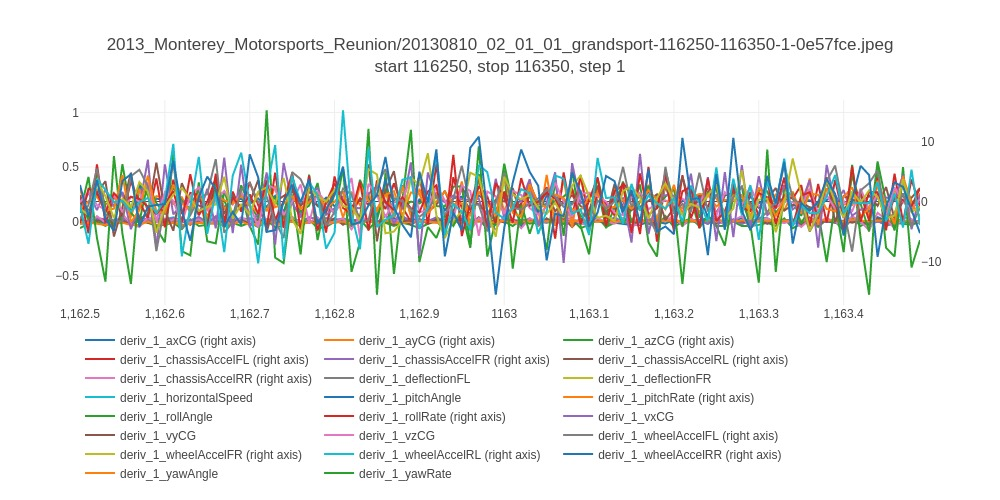

In [7]:
for i, image_path in enumerate(image_paths):
    display(Image(filename=image_path))
    
    if i > 6:
        break